Importance = resulting coverage from placing a single sensor in that output area

In [1]:
from spineq.optimise import calc_oa_weights
from spineq.plotting import plot_oa_importance, plot_oa_weights

import pandas as pd

In [2]:
theta = 500
vmax = 0.05

## Total Population

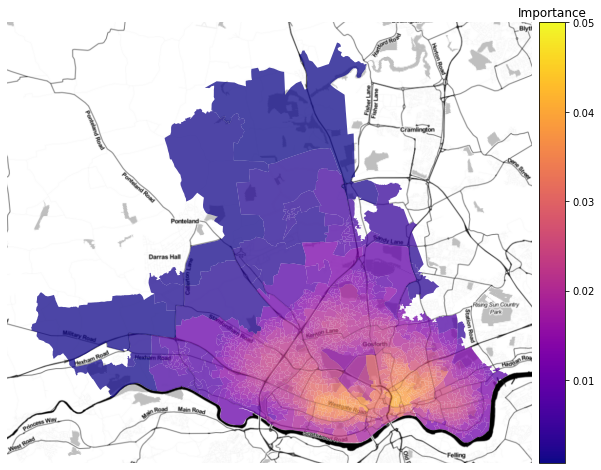

In [4]:
oa_weights = calc_oa_weights(
    pop_age_groups={"pop_total": {'min': 0, 'max': 90, 'weight': 1}},
    population_weight=1,
    workplace_weight=0
)
plot_oa_importance(oa_weights, figsize=(10,10), theta=theta, vmax=vmax)

## Children < 12

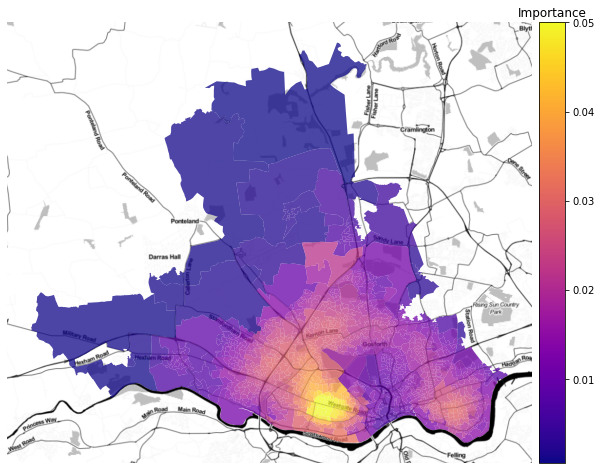

In [5]:
oa_weights = calc_oa_weights(
    pop_age_groups={"pop_children": {'min': 0, 'max': 11, 'weight': 1}},
    population_weight=1,
    workplace_weight=0
)
plot_oa_importance(oa_weights, figsize=(10,10), theta=theta, vmax=vmax)

## Adults >70

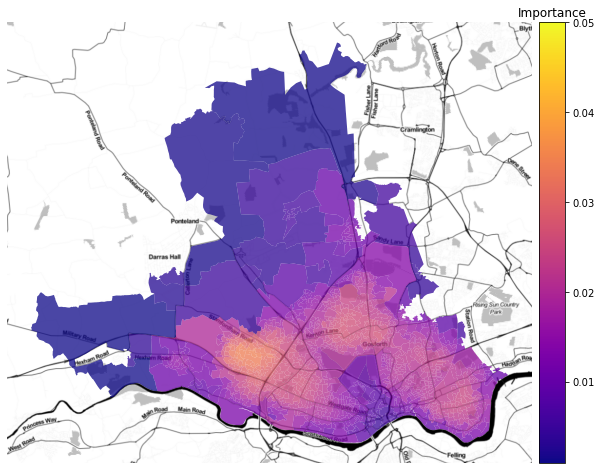

In [6]:
oa_weights = calc_oa_weights(
    pop_age_groups={"pop_elderly": {'min': 70, 'max': 90, 'weight': 1}},
    population_weight=1,
    workplace_weight=0
)

plot_oa_importance(oa_weights, figsize=(10,10), theta=theta, vmax=vmax)

## Workers

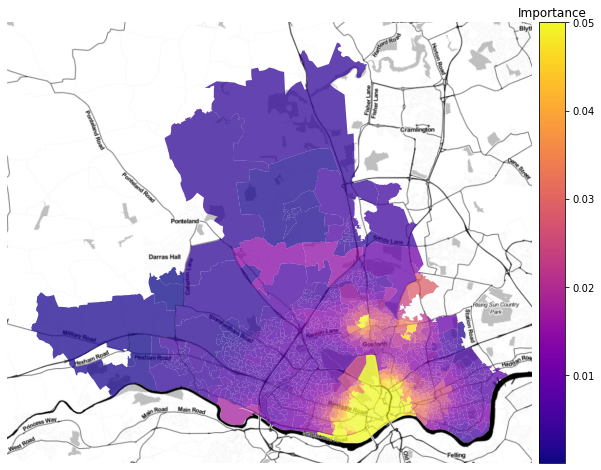

In [7]:
oa_weights = calc_oa_weights(
    population_weight=0,
    workplace_weight=1
)

plot_oa_importance(oa_weights, figsize=(10,10), theta=theta, vmax=vmax)